In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')

  # Install the latest version of torchtext library quietly without showing output

  !pip install torchinfo -qq

  basepath = '/content/drive/MyDrive/Colab Notebooks'

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define file path
file_path = '/content/ACSDP1Y2023.DP05-Data.csv'  # Ensure the filename is correct

# Read CSV file
df = pd.read_csv(file_path)

# Display basic info
df.head()  # First few rows
df.info()
# Load dataset from Excel file
#df = pd.read_csv("ACSDP1Y2023.DP02-Data.csv") # Replace "dp02_data.xlsx" with your Excel file name

# Select relevant columns
df_edu = df[["GEO_ID", "NAME", "DP05_0066PE"]]

# Sort by % high school or higher
df_edu_sorted = df_edu.sort_values(by="DP05_0066PE", ascending=False)

# Add rank
df_edu_sorted["Rank"] = df_edu_sorted["DP05_0066PE"].rank(ascending=False)

# Print the top 5 rows
print(df_edu_sorted.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Columns: 379 entries, GEO_ID to Unnamed: 378
dtypes: float64(1), object(378)
memory usage: 1.1+ MB
             GEO_ID                              NAME  \
0         Geography              Geographic Area Name   
266  310M700US36980          Owensboro, KY Metro Area   
58   310M700US16020  Cape Girardeau, MO-IL Metro Area   
103  310M700US20580         Eagle Pass, TX Metro Area   
108  310M700US21300             Elmira, NY Metro Area   
18   310M700US11640            Arecibo, PR Metro Area   
145  310M700US25020            Guayama, PR Metro Area   
190  310M700US29020             Kokomo, IN Metro Area   
205  310M700US30300        Lewiston, ID-WA Metro Area   
225  310M700US32420           Mayagüez, PR Metro Area   

                                           DP05_0066PE  Rank  
0    Percent!!RACE!!Total population!!Two or More R...   1.0  
266                                                  N  10.5  
58          

In [ ]:
df_pop = df[["GEO_ID", "NAME", "DP05_0001E"]]

# Sort by % high school or higher
df_pop_sorted = df_pop.sort_values(by="DP05_0001E", ascending=False)

# Add rank
#df_edu_sorted["Rank"] = df_edu_sorted["DP02_0066PE"].rank(ascending=False)

# Print the top 5 rows
print(df_pop_sorted.head(10))

             GEO_ID                                      NAME  \
0         Geography                      Geographic Area Name   
366  310M700US47020                   Victoria, TX Metro Area   
159  310M700US26300                Hot Springs, AR Metro Area   
362  310M700US46520             Urban Honolulu, HI Metro Area   
100  310M700US20220                    Dubuque, IA Metro Area   
263  310M700US36540                   Omaha, NE-IA Metro Area   
58   310M700US16020          Cape Girardeau, MO-IL Metro Area   
85   310M700US18700                  Corvallis, OR Metro Area   
144  310M700US24860  Greenville-Anderson-Greer, SC Metro Area   
253  310M700US35380       New Orleans-Metairie, LA Metro Area   

                                  DP05_0001E  
0    Estimate!!SEX AND AGE!!Total population  
366                                    99982  
159                                    99784  
362                                   989408  
100                                    98887  
26

In [ ]:
# Remove any non-numeric values in population column
df_pop = df_pop[df_pop["DP05_0001E"].str.isnumeric()]

# Convert population column to integer
df_pop["DP05_0001E"] = df_pop["DP05_0001E"].astype(int)

# Sort by population in descending order
df_pop_sorted = df_pop.sort_values(by="DP05_0001E", ascending=False)

# Reset index
df_pop_sorted = df_pop_sorted.reset_index(drop=True)

# Print the top 10 rows
print(df_pop_sorted.head(10))

AttributeError: Can only use .str accessor with string values!

In [ ]:
df = df.iloc[1:]  # Remove the header row in the data
df["DP05_0001E"] = pd.to_numeric(df["DP05_0001E"], errors="coerce")

# Sort by population and extract top 20 metros
top_20_metros = df.nlargest(20, "DP05_0001E")[["NAME", "DP05_0001E",'DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E']]

# Display the top 20 metros with population
top_20_metros

<ipython-input-38-dc475107a65d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,DP05_0001E,DP05_0018E,DP05_0010E,DP05_0076PE,DP05_0092E,DP05_0091E
254,"New York-Newark-Jersey City, NY-NJ Metro Area",19498249,39.9,2760153,25.7,13191256,8083521
215,"Los Angeles-Long Beach-Anaheim, CA Metro Area",12799100,38.9,1939962,45.1,8475045,4828892
70,"Chicago-Naperville-Elgin, IL-IN Metro Area",9262559,39.0,1292149,24.3,6508379,3911902
87,"Dallas-Fort Worth-Arlington, TX Metro Area",8100037,35.8,1202571,29.7,5258738,3172287
161,"Houston-Pasadena-The Woodlands, TX Metro Area",7510252,35.7,1067567,38.3,4677016,2978861
21,"Atlanta-Sandy Springs-Roswell, GA Metro Area",6305839,37.6,889992,12.5,4405494,2538356
373,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",6304449,38.3,876150,18.2,4289769,2532369
274,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",6246160,39.5,854015,10.9,4633900,2643828
230,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",6183199,42.3,779784,46.6,4002798,2698630
275,"Phoenix-Mesa-Chandler, AZ Metro Area",5070110,38.0,738890,31.3,3600431,2103658


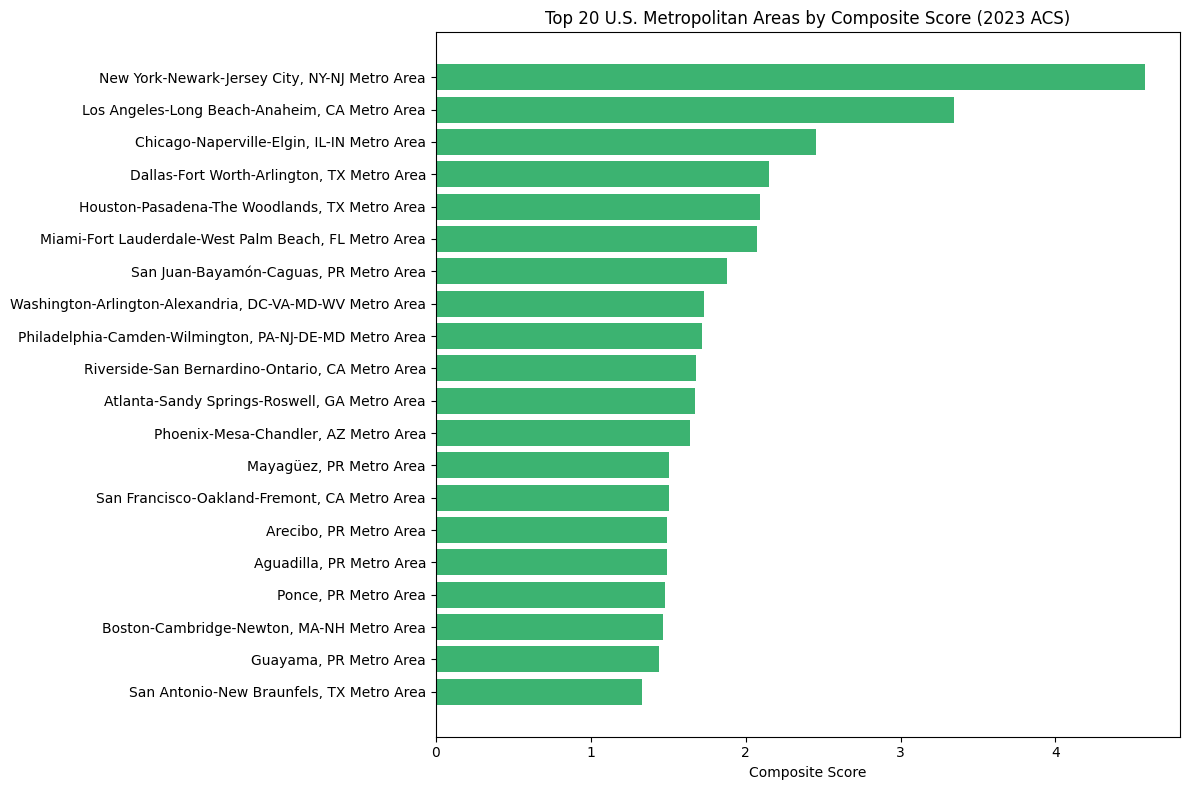

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "ACSDP1Y2023.DP05-Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove the descriptive header row
df_clean = df[1:].copy()

# Columns for composite score
columns = ["DP05_0001E", "DP05_0018E", "DP05_0010E", "DP05_0076PE", "DP05_0092E", "DP05_0091E"]
df_clean[columns] = df_clean[columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in any of these columns
df_clean = df_clean.dropna(subset=columns)

# Normalize the columns using MinMaxScaler
scaler = MinMaxScaler()
df_clean[[f"{col}_norm" for col in columns]] = scaler.fit_transform(df_clean[columns])

# Compute composite score (equal weight for all normalized columns)
df_clean["Composite_Score"] = df_clean[[f"{col}_norm" for col in columns]].sum(axis=1)

# Sort by score and get top 20
top20_composite = df_clean.sort_values(by="Composite_Score", ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top20_composite["NAME"], top20_composite["Composite_Score"], color='mediumseagreen')
plt.xlabel("Composite Score")
plt.title("Top 20 U.S. Metropolitan Areas by Composite Score (2023 ACS)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<ipython-input-43-a90375666a27>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




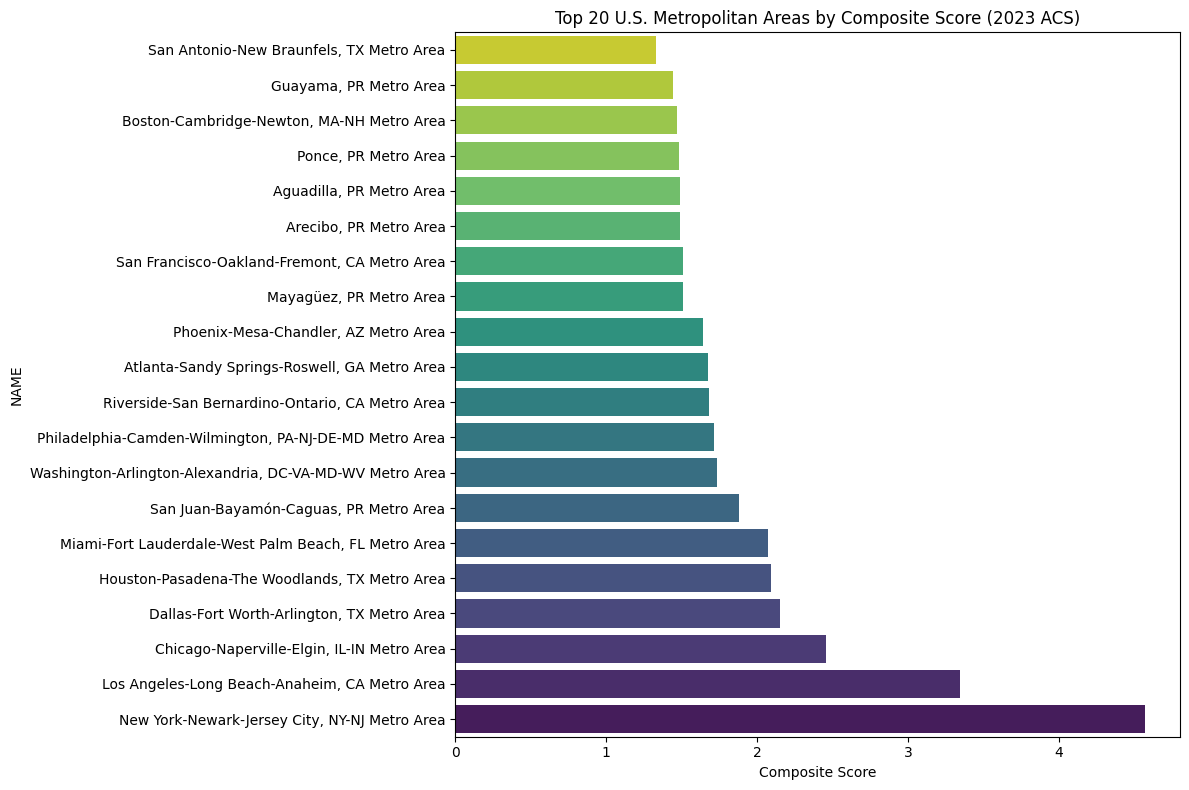

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Load dataset
file_path = "ACSDP1Y2023.DP05-Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove the descriptive header row
df_clean = df[1:].copy()

# Columns for composite score
columns = ["DP05_0001E", "DP05_0018E", "DP05_0010E", "DP05_0076PE", "DP05_0092E", "DP05_0091E"]
df_clean[columns] = df_clean[columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in any of these columns
df_clean = df_clean.dropna(subset=columns)

# Normalize the columns using MinMaxScaler
scaler = MinMaxScaler()
df_clean[[f"{col}_norm" for col in columns]] = scaler.fit_transform(df_clean[columns])

# Compute composite score (equal weight for all normalized columns)
df_clean["Composite_Score"] = df_clean[[f"{col}_norm" for col in columns]].sum(axis=1)

# Sort by score and get top 20
top20_composite = df_clean.sort_values(by="Composite_Score", ascending=False).head(20)

# Plotting with seaborn's viridis palette
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top20_composite,
    y="NAME",
    x="Composite_Score",
    palette="viridis"
)

# Add labels and title
plt.xlabel("Composite Score")
plt.title("Top 20 U.S. Metropolitan Areas by Composite Score (2023 ACS)")

# Invert y-axis for descending order
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


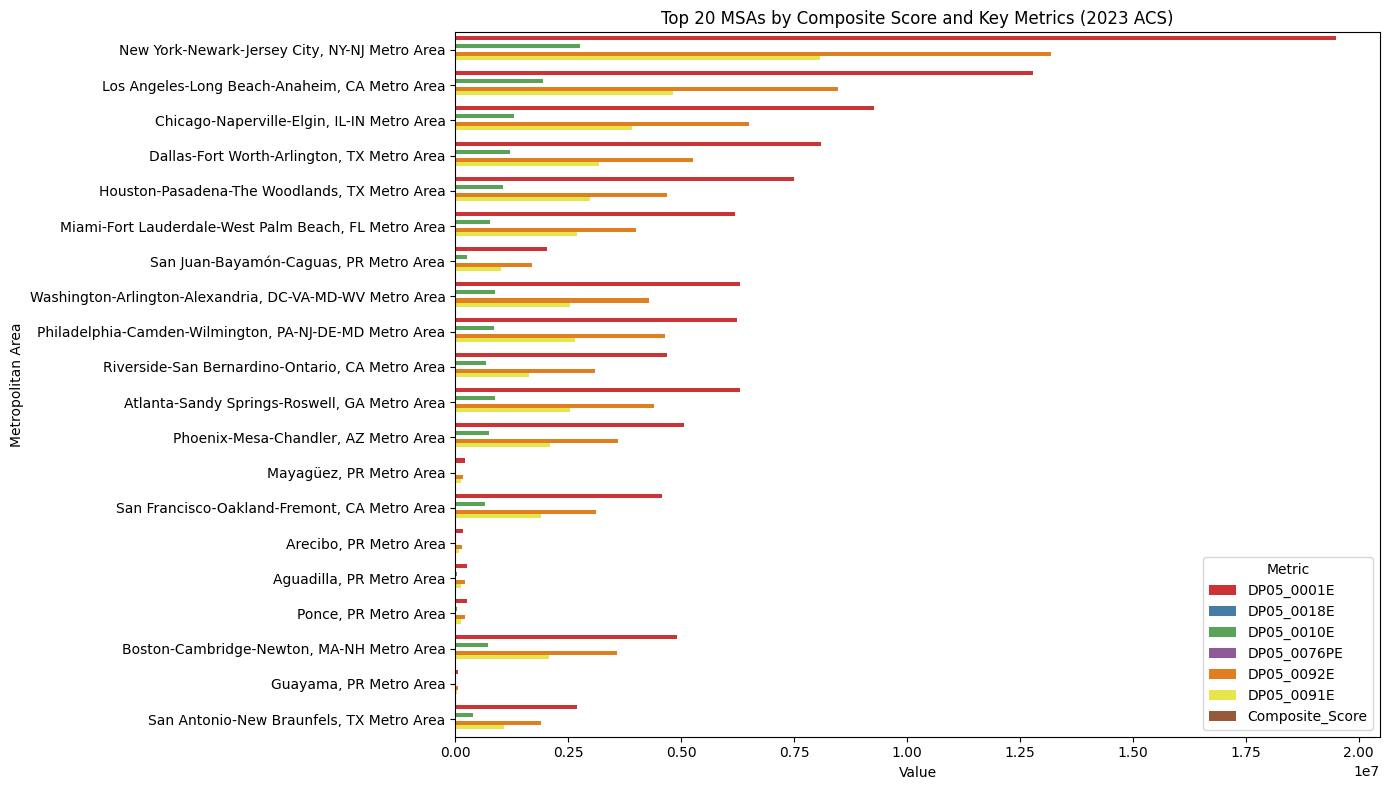

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "ACSDP1Y2023.DP05-Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove the descriptive header row
df_clean = df[1:].copy()

# Columns for composite score
columns = ["DP05_0001E", "DP05_0018E", "DP05_0010E", "DP05_0076PE", "DP05_0092E", "DP05_0091E"]
df_clean[columns] = df_clean[columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in any of these columns
df_clean = df_clean.dropna(subset=columns)

# Normalize the columns using MinMaxScaler
scaler = MinMaxScaler()
df_clean[[f"{col}_norm" for col in columns]] = scaler.fit_transform(df_clean[columns])

# Compute composite score (equal weight for all normalized columns)
df_clean["Composite_Score"] = df_clean[[f"{col}_norm" for col in columns]].sum(axis=1)

# Sort by score and get top 20
top20_composite = df_clean.sort_values(by="Composite_Score", ascending=False).head(20)

# Melt the dataframe to make it suitable for grouped bar plot
top20_melted = top20_composite.melt(id_vars=["NAME"], value_vars=["DP05_0001E", "DP05_0018E", "DP05_0010E", "DP05_0076PE", "DP05_0092E", "DP05_0091E", "Composite_Score"],
                                    var_name="Metric", value_name="Value")

# Set up the plot size
plt.figure(figsize=(14, 8))

# Create a grouped bar plot with the 'Set1' palette
sns.barplot(data=top20_melted, x="Value", y="NAME", hue="Metric", dodge=True, palette="Set1")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Metropolitan Area")
plt.title("Top 20 MSAs by Composite Score and Key Metrics (2023 ACS)")

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


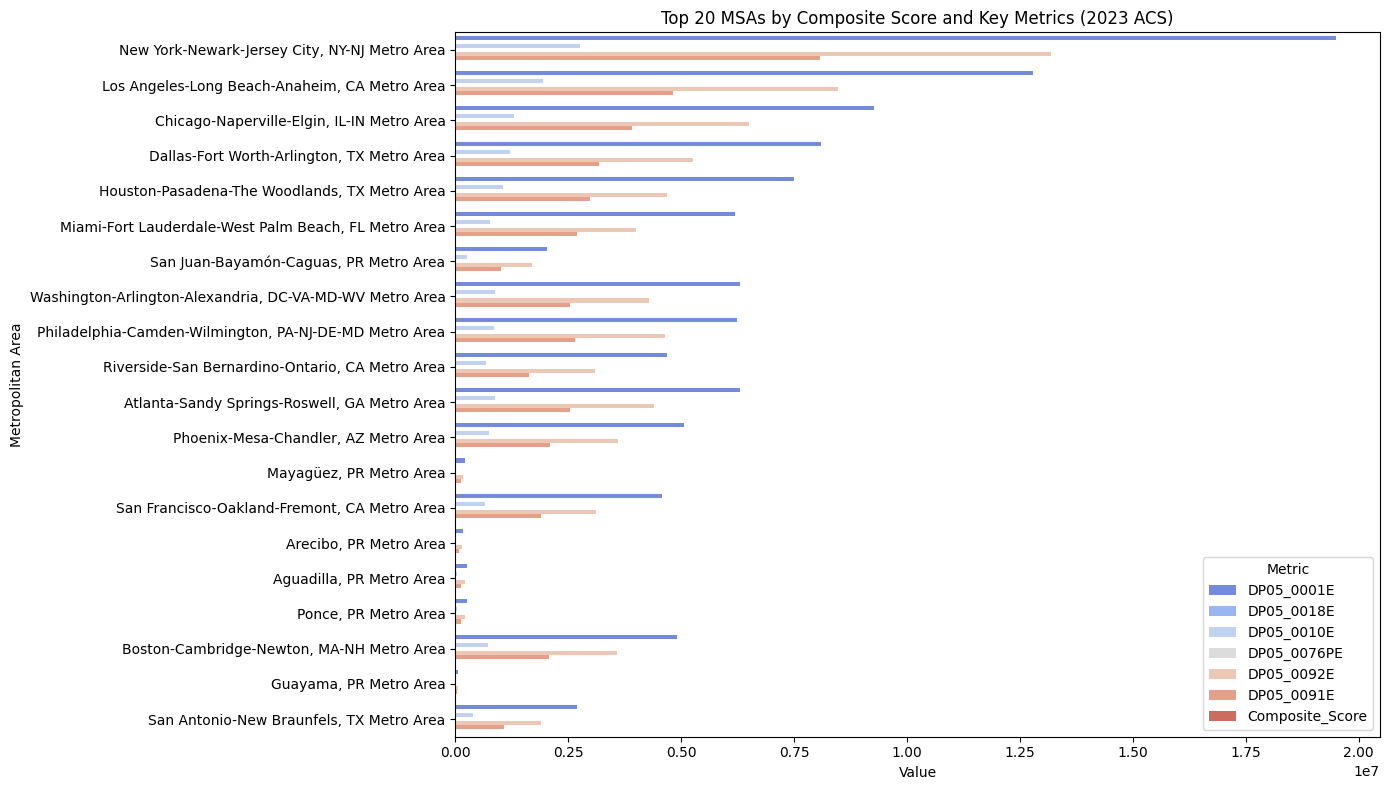

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "ACSDP1Y2023.DP05-Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove the descriptive header row
df_clean = df[1:].copy()

# Columns for composite score
columns = ["DP05_0001E", "DP05_0018E", "DP05_0010E", "DP05_0076PE", "DP05_0092E", "DP05_0091E"]
df_clean[columns] = df_clean[columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in any of these columns
df_clean = df_clean.dropna(subset=columns)

# Normalize the columns using MinMaxScaler
scaler = MinMaxScaler()
df_clean[[f"{col}_norm" for col in columns]] = scaler.fit_transform(df_clean[columns])

# Compute composite score (equal weight for all normalized columns)
df_clean["Composite_Score"] = df_clean[[f"{col}_norm" for col in columns]].sum(axis=1)

# Sort by score and get top 20
top20_composite = df_clean.sort_values(by="Composite_Score", ascending=False).head(20)

# Melt the dataframe to make it suitable for grouped bar plot
top20_melted = top20_composite.melt(id_vars=["NAME"], value_vars=["DP05_0001E", "DP05_0018E", "DP05_0010E", "DP05_0076PE", "DP05_0092E", "DP05_0091E", "Composite_Score"],
                                    var_name="Metric", value_name="Value")

# Set up the plot size
plt.figure(figsize=(14, 8))

# Create a grouped bar plot with distinct palettes
sns.barplot(data=top20_melted, x="Value", y="NAME", hue="Metric", dodge=True, palette="coolwarm")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Metropolitan Area")
plt.title("Top 20 MSAs by Composite Score and Key Metrics (2023 ACS)")

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-37-c0a4682d59b5>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



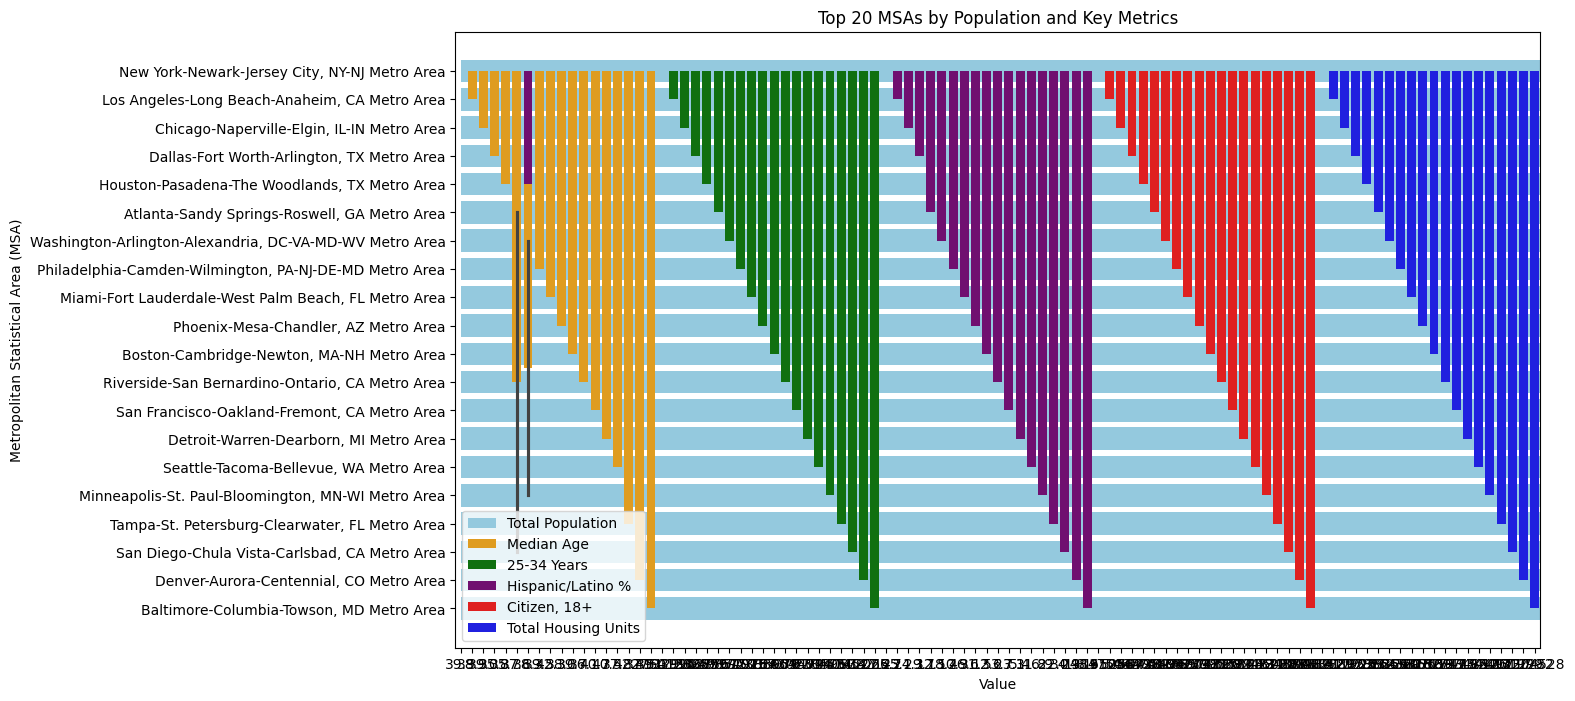

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and preprocessed
df = df.iloc[1:]  # Remove the header row in the data
df["DP05_0001E"] = pd.to_numeric(df["DP05_0001E"], errors="coerce")

# Sort by population and extract the top 20 metros
top_20_metros = df.nlargest(20, "DP05_0001E")[["NAME", "DP05_0001E", 'DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E']]

# Set up the figure and axis for the visualization
plt.figure(figsize=(14, 8))

# Create a bar plot for total population
sns.barplot(x='DP05_0001E', y='NAME', data=top_20_metros, color='skyblue', label="Total Population")

# Add additional bars for other metrics (median age, 25-34 years, etc.)
sns.barplot(x='DP05_0018E', y='NAME', data=top_20_metros, color='orange', label="Median Age")
sns.barplot(x='DP05_0010E', y='NAME', data=top_20_metros, color='green', label="25-34 Years")
sns.barplot(x='DP05_0076PE', y='NAME', data=top_20_metros, color='purple', label="Hispanic/Latino %")
sns.barplot(x='DP05_0092E', y='NAME', data=top_20_metros, color='red', label="Citizen, 18+")
sns.barplot(x='DP05_0091E', y='NAME', data=top_20_metros, color='blue', label="Total Housing Units")

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Metropolitan Statistical Area (MSA)')
plt.title('Top 20 MSAs by Population and Key Metrics')

# Show legend for the bars
plt.legend()

# Adjust


In [ ]:
import pandas as pd

# Assuming the dataset is loaded into a pandas DataFrame (df)
# Remove the first row (header row) if necessary
df = df.iloc[1:]

# Convert the relevant columns to numeric, where appropriate, and handle errors by coercing invalid values
df["DP05_0001E"] = pd.to_numeric(df["DP05_0001E"], errors="coerce")

# Select only the required columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M', 'DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E']

# Sort by Total Population (DP05_0001E) in descending order and extract the top 20
top_20_metros = df.nlargest(20, columns_to_extract)

# Display the top 20 MSAs with population and additional columns for context
print(top_20_metros)


<ipython-input-35-8cd5aa51ebb8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: Column 'GEO_ID' has dtype object, cannot use method 'nlargest' with this dtype

In [ ]:
import pandas as pd

# Assuming the dataset is loaded into a pandas DataFrame (df)
# Remove the first row (header row) if necessary
df = df.iloc[1:]

# Convert the relevant columns to numeric, where appropriate, and handle errors by coercing invalid values
df["DP05_0001E"] = pd.to_numeric(df["DP05_0001E"], errors="coerce")

# Select only the required columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M', 'DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E']

# Sort by Total Population (DP05_0001E) in descending order and extract the top 20
# The 'nlargest' method only works with a single column for sorting, so we'll use 'DP05_0001E'
top_20_metros = df.nlargest(20, "DP05_0001E")  # Sort by 'DP05_0001E'

print(top_20_metros)
# Then, select the desired columns from the sorted DataFrame
top_20_metros = top_20_metros[columns_to_extract]

# Display the top 20 MSAs with population and additional columns for context
print(top_20_metros)

             GEO_ID                                               NAME  \
254  310M700US35620      New York-Newark-Jersey City, NY-NJ Metro Area   
215  310M700US31080      Los Angeles-Long Beach-Anaheim, CA Metro Area   
70   310M700US16980         Chicago-Naperville-Elgin, IL-IN Metro Area   
87   310M700US19100         Dallas-Fort Worth-Arlington, TX Metro Area   
161  310M700US26420      Houston-Pasadena-The Woodlands, TX Metro Area   
21   310M700US12060       Atlanta-Sandy Springs-Roswell, GA Metro Area   
373  310M700US47900  Washington-Arlington-Alexandria, DC-VA-MD-WV M...   
274  310M700US37980  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...   
230  310M700US33100  Miami-Fort Lauderdale-West Palm Beach, FL Metr...   
275  310M700US38060               Phoenix-Mesa-Chandler, AZ Metro Area   
45   310M700US14460          Boston-Cambridge-Newton, MA-NH Metro Area   
296  310M700US40140    Riverside-San Bernardino-Ontario, CA Metro Area   
317  310M700US41860       San Francisc

<ipython-input-28-724c856f7de4>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: "['DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E'] not in index"

<ipython-input-12-a25783c7af49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


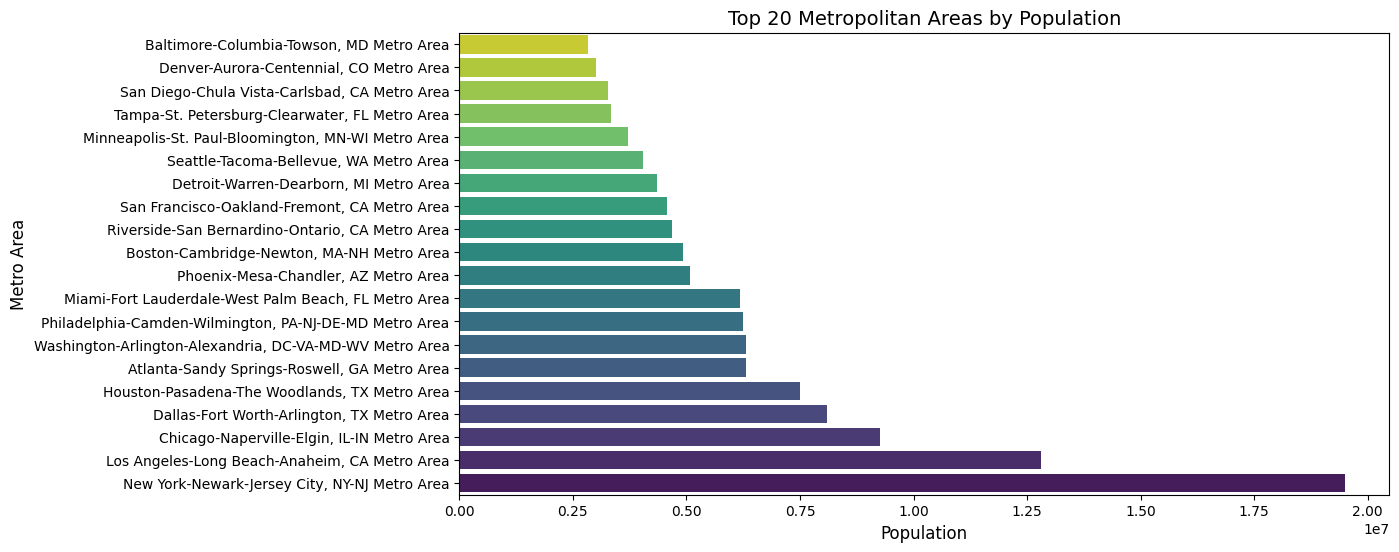

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_metros,
    y="NAME",
    x="DP05_0001E",
    palette="viridis"
)

# Labels and title
plt.xlabel("Population", fontsize=12)
plt.ylabel("Metro Area", fontsize=12)
plt.title("Top 20 Metropolitan Areas by Population", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M', 'DP05_0018E','DP05_0010E','DP05_0076PE','DP05_0092E','DP05_0091E']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in descending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=False)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Create a bar plot of the top 20 MSAs by population
plt.figure(figsize=(10, 6))
plt.barh(top_20_msas['NAME'], top_20_msas['DP05_0001E'], color='skyblue')
plt.xlabel('Total Population')
plt.title('Top 20 MSAs by Population')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()


KeyError: "['DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E'] not in index"

<ipython-input-14-4965d622ff21>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


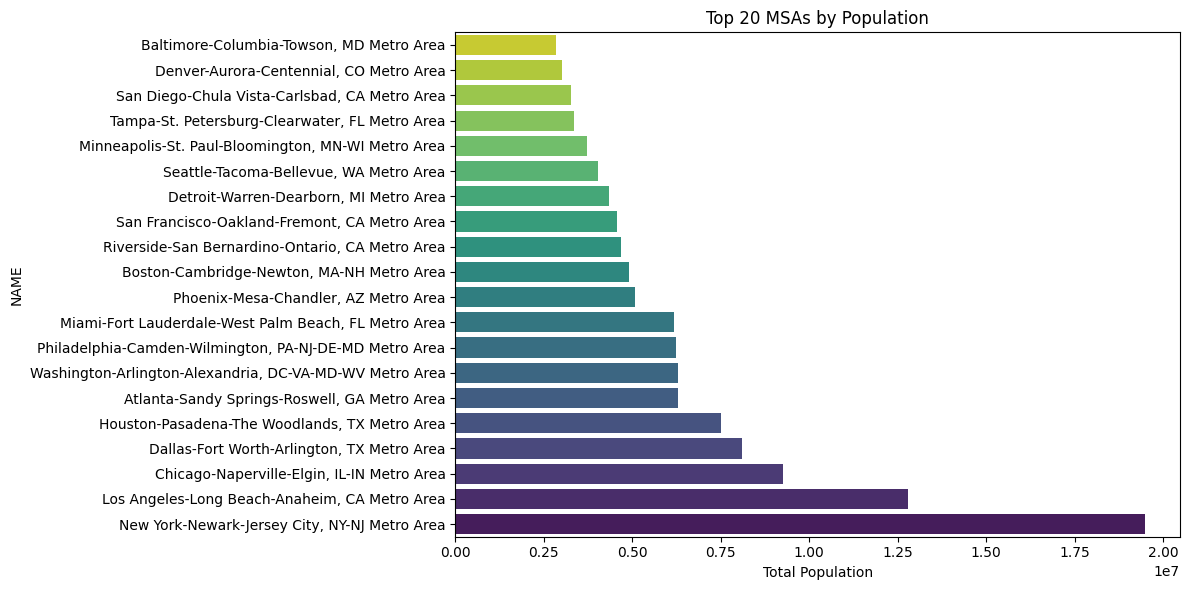

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in descending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=False)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Create a bar plot of the top 20 MSAs by population using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_msas,
    y="NAME",
    x="DP05_0001E",
    palette="viridis"
)

# Set labels and title
plt.xlabel('Total Population')
plt.title('Top 20 MSAs by Population')

# Invert y-axis for descending order
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<ipython-input-16-b0f75343560c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


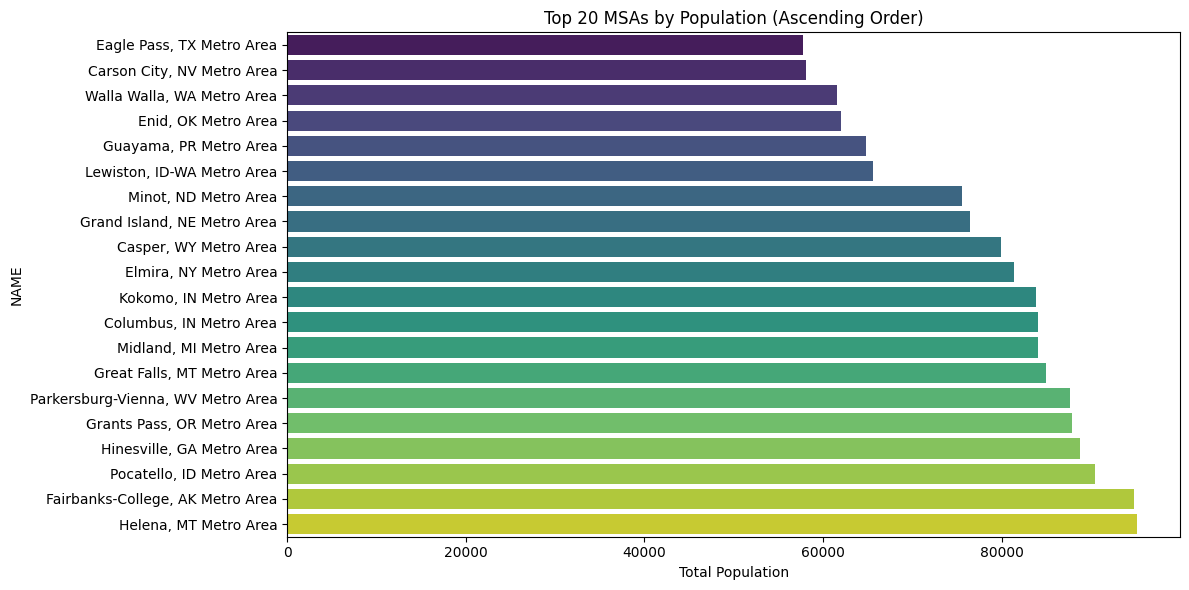

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in ascending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=True)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Create a bar plot of the top 20 MSAs by population using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_msas,
    y="NAME",
    x="DP05_0001E",
    palette="viridis"
)

# Set labels and title
plt.xlabel('Total Population')
plt.title('Top 20 MSAs by Population (Ascending Order)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<ipython-input-15-b0f75343560c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


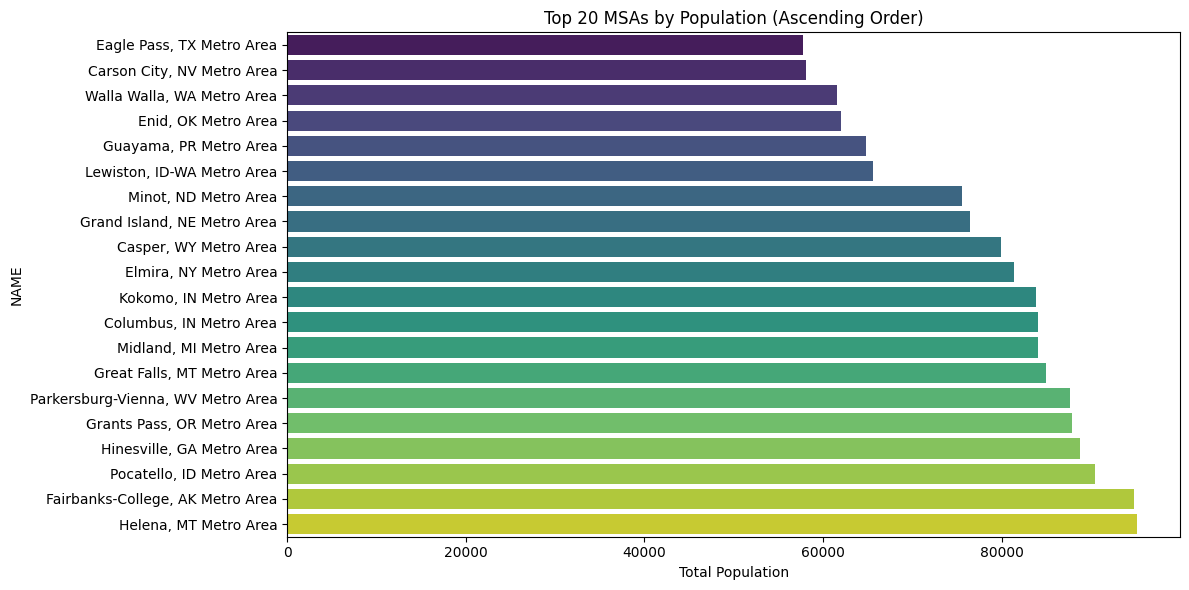

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in ascending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=True)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Create a bar plot of the top 20 MSAs by population using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_msas,
    y="NAME",
    x="DP05_0001E",
    palette="viridis"
)

# Set labels and title
plt.xlabel('Total Population')
plt.title('Top 20 MSAs by Population (Ascending Order)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
pip install plotly geopandas


In [ ]:
import pandas as pd
import plotly.express as px
import geopandas as gpd

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in descending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=False)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Load MSA boundaries (GeoJSON) for visualization
# You can find a MSA boundary GeoJSON for the USA (example: from census.gov)
msa_geojson_url = 'https://raw.githubusercontent.com/OpenDataDE/State-County-GeoJSON/master/usa/msa/msa.geojson'

# Create choropleth map using Plotly Express
fig = px.choropleth(
    top_20_msas,
    geojson=msa_geojson_url,
    locations='GEO_ID',  # Match GEO_ID with the GeoJSON
    color='DP05_0001E',  # Population as color scale
    hover_name='NAME',
    hover_data=['DP05_0001E'],
    title='Top 20 MSAs by Population',
    color_continuous_scale="Viridis",
    labels={'DP05_0001E': 'Total Population'}
)

# Update layout for better presentation
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    geo=dict(showland=True, landcolor="white", subunitcolor="gray"),
    margin={"r":0,"t":0,"l":0,"b":0},
)

# Show the map
fig.show()


<ipython-input-19-3b6d6309111f>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




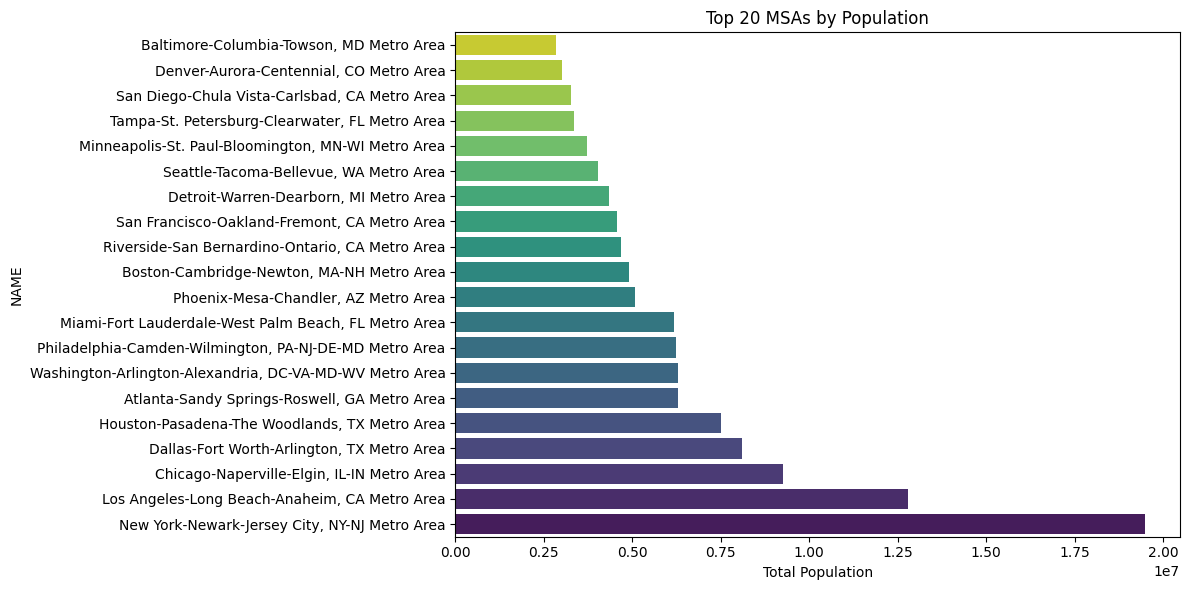

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in descending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=False)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Create a bar plot of the top 20 MSAs by population using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_msas,
    y="NAME",
    x="DP05_0001E",
    palette="viridis"
)

# Set labels and title
plt.xlabel('Total Population')
plt.title('Top 20 MSAs by Population')

# Invert y-axis for descending order (largest population at the top)
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a pandas DataFrame (df)

# Extract the relevant columns
columns_to_extract = ['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M', 'DP05_0018E','DP05_0010E','DP05_0076PE','DP05_0092E','DP05_0091E']  # Modify as per your dataset
df = df[columns_to_extract]

# Sort by Total Population (DP05_0001E) in descending order
df_sorted = df.sort_values(by='DP05_0001E', ascending=False)

# Get the top 20 MSAs
top_20_msas = df_sorted.head(20)

# Create a bar plot of the top 20 MSAs by population using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_msas,
    y="NAME",
    x="DP05_0001E",
    palette="viridis"
)

# Set labels and title
plt.xlabel('Total Population')
plt.title('Top 20 MSAs by Population')

# Invert y-axis for descending order (largest population at the top)
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


KeyError: "['DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E'] not in index"